In [1]:
import pandas as pd
from sklearn.metrics import PrecisionRecallDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from core import read_dom_table
import os

In [2]:
train_search_results = read_dom_table('../data/interim/train_test_hmm_search_dom.txt')
test_annotations = pd.read_parquet('../data/interim/test_seq_names_processes.pq')
test_y = pd.read_csv('../data/interim/test_y.csv')

In [3]:
score_col = 'seq_score'
agg_search_results = (train_search_results.sort_values(score_col, ascending=False)
                      .groupby('target')
                     .head(1)
                     .rename(columns={score_col: 'train_search_score'}))

In [4]:
test_predictions = (test_y.merge(agg_search_results.rename(columns={'target': 'seq_id'}), 
                                 how='left', on='seq_id')
                    .sample(frac=1, random_state=7))
test_predictions['train_search_score'] = test_predictions['train_search_score'].fillna(0)

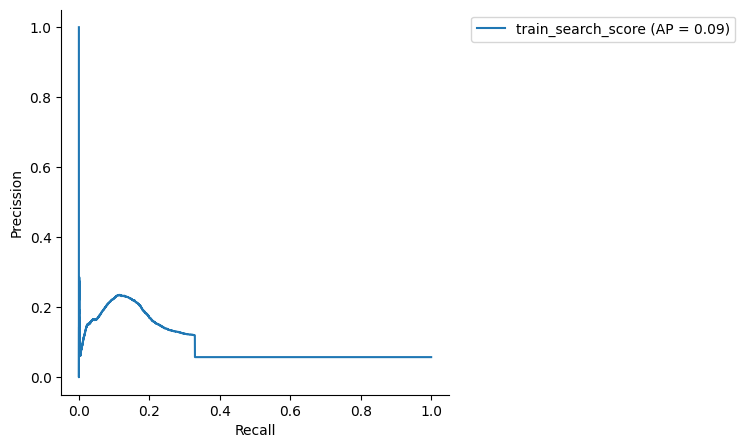

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
display = PrecisionRecallDisplay.from_predictions(test_predictions['defense'], 
                                                  test_predictions['train_search_score'], 
                                                  name='train_search_score', 
                                                  ax=ax)
sns.despine()
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [6]:
test_prediction_annotations = test_predictions.merge(test_annotations, 
                                                     how='inner', on='seq_id')

In [7]:
(test_prediction_annotations[~test_prediction_annotations['defense']]
 .sort_values('train_search_score', ascending=False)
 .head(50))

,seq_id,defense,target_accession,tlen,query,query_accession,qlen,seq_evalue,train_search_score,seq_bias,...,env_from,env_to,acc,targ_description,protein_id,protein_context_id,gene_name,name,go_process,cog_name
138216,d701895aa44a41043d40d0fae0c232f805308d780c7194...,False,-,1458.0,pglW,-,1468.0,0.000000e+00,1015.1,55.0,...,22.0,1458.0,0.88,-,WP_246357013.1,WP_246357013.1|NZ_JABBJJ010000053.1|37697|-,None,protein kinase,protein phosphorylation,None
147087,c53acdc1031d1d09a2381c8e29b9ff3a81505a2de69d52...,False,-,1378.0,pglW,-,1468.0,2.500000e-294,983.1,47.3,...,5.0,1378.0,0.89,-,WP_227026829.1,WP_227026829.1|NZ_JAAIYO010000001.1|436209|-,None,protein kinase,protein phosphorylation,None
147772,405bc82f37e486ae6d6c4ad0959737fcba13cb391a7092...,False,-,809.0,pglW,-,1468.0,5.100000e-278,929.0,26.9,...,1.0,785.0,0.93,-,WP_225618267.1,WP_225618267.1|NZ_CP119182.1|2369282|-,None,protein kinase,protein phosphorylation,None
57575,de8082a3eb02b7ed0783f0eafbd5418d73ff4143a727ce...,False,-,1053.0,PsyrTA_PsyrT,-,689.0,1.800000e-216,723.7,0.0,...,353.0,1053.0,0.95,-,WP_019239718.1,WP_019239718.1|NZ_CAPF01000065.1|30303|-,None,RecQ family ATP-dependent DNA helicase,DNA recombination,None
67393,077ec7c520a8cb5cde42a5edbdd4e43f35c9a4be531014...,False,-,710.0,PsyrTA_PsyrT,-,689.0,6.200000e-212,708.7,0.0,...,5.0,710.0,0.96,-,WP_167510033.1,WP_167510033.1|NZ_VFMQ01000001.1|1396470|-,None,RecQ family ATP-dependent DNA helicase,DNA recombination,None
146216,9b850801b9d020e2f7a31371c25f57e7cb8982cb4cd810...,False,-,710.0,PsyrTA_PsyrT,-,689.0,6.700000e-212,708.6,0.0,...,5.0,710.0,0.96,-,WP_175324980.1,WP_175324980.1|NZ_JABMCG010000057.1|20408|-,None,RecQ family ATP-dependent DNA helicase,DNA recombination,None
13322,849855014b4aedb2b0aadbf0f8818bb17617c96173d375...,False,-,709.0,PsyrTA_PsyrT,-,689.0,6.700000e-212,708.6,0.0,...,3.0,709.0,0.96,-,WP_232749808.1,WP_232749808.1|NZ_JAIWKR010000003.1|502034|-,None,RecQ family ATP-dependent DNA helicase,DNA recombination,None
107091,0d8537574db51d60df8dd46b6fbf372e6287df48617f1e...,False,-,718.0,PsyrTA_PsyrT,-,689.0,1.100000e-211,707.9,0.0,...,15.0,718.0,0.96,-,WP_244993438.1,WP_244993438.1|NZ_CP071883.1|1242441|-,None,RecQ family ATP-dependent DNA helicase,DNA recombination,None
156385,1b5c51bad93304d0bab46d9de90635205a61477c5cfa7b...,False,-,719.0,PsyrTA_PsyrT,-,689.0,1.000000e-210,704.7,0.0,...,17.0,719.0,0.96,-,WP_254700994.1,WP_254700994.1|NZ_BSFA01000002.1|74697|+,None,RecQ family ATP-dependent DNA helicase,DNA recombination,None
175579,19c6c0b0915e99c5ff65e788bb7fc812ada6bfbea71683...,False,-,704.0,PsyrTA_PsyrT,-,689.0,8.800000e-210,701.6,0.0,...,5.0,704.0,0.96,-,WP_202343180.1,WP_202343180.1|NZ_QYAC01000001.1|255307|+,None,RecQ family ATP-dependent DNA helicase,DNA recombination,None


In [8]:
(test_prediction_annotations[~test_prediction_annotations['defense']].groupby('name')
 .agg(n = ('name', 'count'),
      avg_score = ('train_search_score', 'mean'))
 .sort_values('avg_score', ascending=False)
 .head(50))

,n,avg_score
name,,
IscS subfamily cysteine desulfurase,1,408.100000
ATP-dependent DNA helicase DinG,19,401.468421
cysteine desulfurase NifS,1,372.300000
DNA helicase PcrA,6,365.766667
DNA helicase II,3,364.066667
DNA helicase RecQ,86,349.293023
DNA helicase Rep,2,343.100000
RecQ family ATP-dependent DNA helicase,88,341.695455
ATP-dependent DNA helicase,1,336.400000


In [9]:
(test_prediction_annotations[~test_prediction_annotations['defense']].groupby('query')
 .agg(n = ('name', 'count'),
      avg_score = ('train_search_score', 'mean'))
 .sort_values('avg_score', ascending=False)
 .head(50))

,n,avg_score
query,,
DinG_IV-A_2,48,235.231250
RT_I_II_III_IV_V_VI_1,105,232.206667
Type_II_MTases_FAM_11,7,206.428571
drmD,5,194.200000
DpdE,12,189.041667
Type_II_MTases_FAM_35,6,183.600000
FolE,18,179.150000
Type_II_MTases_FAM_25,2,172.100000
Type_II_MTases_FAM_5,28,148.017857


In [10]:
test_predictions[['seq_id', 'train_search_score']].to_csv('../data/interim/test_predictions_train_search.csv', index=False)